#Movie Genre Classification

>This notebook aims to create a Machine Learning model that can predict the genre of a movie based on its plot summary or other textual information using
Data Preprocessing techniques like TF-IDF or word embeddings for classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines.

# Mounting Drive and Setting Working Directory

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


# Description of the Dataset

In [21]:
import pandas as pd
import numpy as np
import spacy
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

The dataset contains the ID, Title, Genre and Description for many movies

In [3]:
#Replace path of the dataset in your drive
%cd '/content/gdrive/MyDrive/Genre Classification Dataset'

/content/gdrive/MyDrive/Genre Classification Dataset


In [ ]:
with open('description.txt') as f:
  print(f.read())

Train data:
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION

Test data:
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION

Source:
ftp://ftp.fu-berlin.de/pub/misc/movies/database/


## Importing Libraries and Models

In [ ]:
train_df = pd.read_csv('train_data.txt',header=None,sep=':::')
test_df = pd.read_csv('test_data.txt',header=None,sep=':::')
train_df.columns = ['ID','Title','Genre','Description']
test_df.columns = ['ID','Title','Description']

<ipython-input-47-9db96cad7be7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_df = pd.read_csv('train_data.txt',header=None,sep=':::')
<ipython-input-47-9db96cad7be7>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_df = pd.read_csv('test_data.txt',header=None,sep=':::')


In [ ]:
train_df.to_csv('train_data.csv',index=None)
test_df.to_csv('test_data.csv',index=None)

# Data Frame Creation

In [ ]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [ ]:
train_df.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
test_df.head()

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


# Data Preprocessing

Check for missing data

In [ ]:
train_df.isna().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
test_df.isna().sum()

ID             0
Title          0
Description    0
dtype: int64

# Removing Stopping Words, Tokenization, Removing Punctuation,etc.

In [ ]:
train_desc = np.array(train_df['Description'])
train_desc = list(train_desc)
train_desc[0:3]

[' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.',
 ' A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.',
 ' As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most e

In [ ]:
test_desc = np.array(test_df['Description'])
test_desc = list(test_desc)

Removing Stopping Words and removing whitespaces spaces in training dataframe

In [ ]:
# Load spacy English model
nlp = spacy.load("en_core_web_sm")

for i,text in enumerate(train_desc):
  doc = nlp(text)
  filtered_words = [token.text for token in doc if not token.is_stop]
  clean_text = ' '.join(filtered_words)
  train_desc[i] = clean_text

Removing Stopping Words and removing whitespaces in test dataframe

In [ ]:
#After this step, save the cleaned descriptions in the dataframe as a separate field
for i,text in enumerate(test_desc):
  doc = nlp(text)
  filtered_words = [token.text for token in doc if not token.is_stop]
  clean_text = ' '.join(filtered_words)
  test_desc[i] = clean_text

## Data Frame with clean descriptions are saved as a csv as to not repeat cleaning

In [ ]:
#Run once to save preprocessing changes to the dataset so that
#preprocessing need not be carried out multiple times
train_df.to_csv('train_data.csv',index=None)
test_df.to_csv('test_data.csv',index=None)

Removing all non alphabets in training dataframe

In [6]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [8]:
import re
train_desc = list(train_df['clean_Desc'])
for i,text in enumerate(train_desc):
  text = re.sub("\'", "", text)
  text = re.sub("[^a-zA-Z]"," ",text)
  text = ' '.join(text.split())
  train_desc[i] = text

Removing all non alphabets in test dataframe

In [9]:
test_desc = list(test_df['clean_Desc'])
for i,text in enumerate(test_desc):
  text = re.sub("\'", "", text)
  text = re.sub("[^a-zA-Z]"," ",text)
  text = ' '.join(text.split())
  test_desc[i] = text

In [10]:
train_genre_set = list(train_df['Genre'].unique())
for i,x in enumerate(train_genre_set):
  train_genre_set[i] = ''.join(x.split())
len(train_genre_set)

27

In [11]:
train_df['clean_Desc'] = pd.Series(train_desc)
train_df['clean_Desc'] = train_df['clean_Desc'].apply(lambda x: x.lower())
train_df

,ID,Title,Genre,Description,clean_Desc
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father ends meet edith twin si...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers un recovered bodies ground z...
...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,generation exploitation sisters kapa bay soror...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",ze bestaan echt stand comedy growing facing fe...
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


In [12]:
test_df['clean_Desc'] = pd.Series(test_desc)
test_df['clean_Desc'] = test_df['clean_Desc'].apply(lambda x:x.lower())
test_df.head()

,ID,Title,Description,clean_Desc,Genre NB,SVM Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane loves life car apartment job especia...,drama,comedy
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child belonging weal...,drama,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,year life albin family shepherds north transyl...,documentary,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother years cancer diego ...,drama,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...,drama,drama


## Plotting genres against the number of movies for the genre in the test database

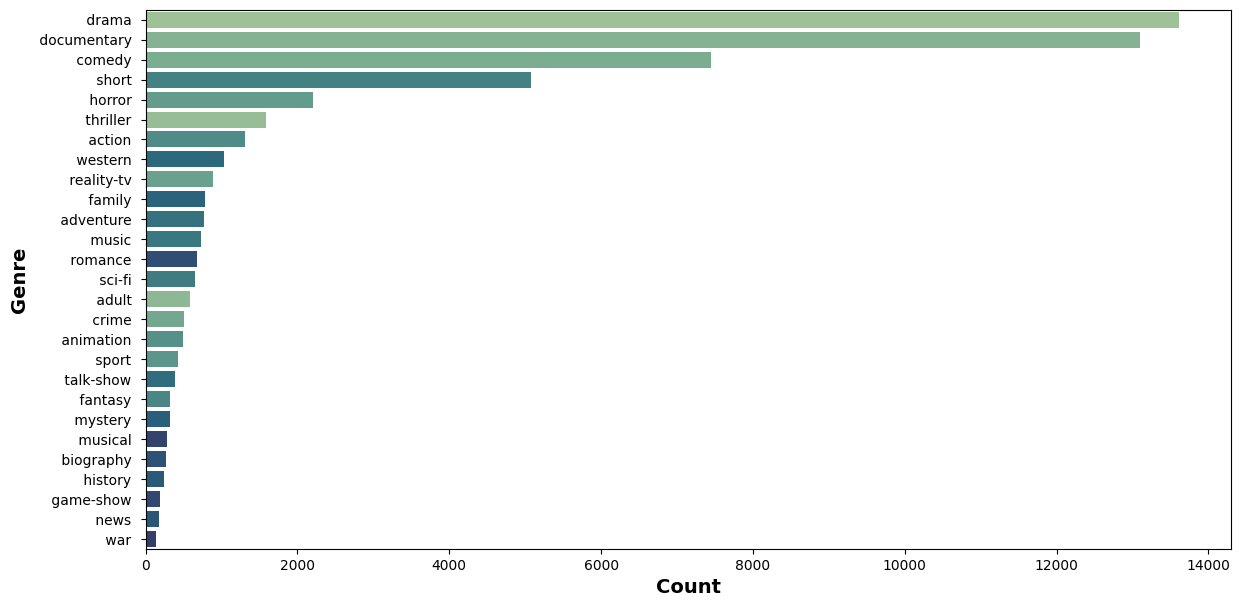

In [13]:
order_genre = train_df['Genre'].value_counts().index
plt.figure(figsize=(14,7))
sns.countplot(data=train_df,y='Genre',order=order_genre,hue='Genre',palette='crest')
plt.xlabel('Count',fontsize=14,fontweight='bold')
plt.ylabel('Genre',fontsize=14,fontweight='bold')
plt.show()

## Vectorization of clean text


In [96]:
tfidf_vectorizer = TfidfVectorizer()
X_Train = tfidf_vectorizer.fit_transform(train_df['clean_Desc'])
X_Test = tfidf_vectorizer.transform(test_df['clean_Desc'])

## TF_IDF matrices

In [97]:
X = X_Train
y = train_df['Genre']

X_Train, X_Val, Y_Train, Y_Val = train_test_split(X,y,test_size=0.4,random_state=120)

### Building, Training and Validating the Naive Bayes Model

In [98]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_Train,Y_Train)

y_pred = NB_classifier.predict(X_Val)
accuracy = accuracy_score(Y_Val,y_pred)
print('Validation Accuracy',accuracy)

Validation Accuracy 0.4451720003689016


In [99]:
NB_classifier.fit(X_Train,Y_Train)

y_test_pred = NB_classifier.predict(X_Test)
test_df['Genre NB'] = y_test_pred
test_df.head()

,ID,Title,Description,clean_Desc,Genre NB,Genre LR
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane loves life car apartment job especia...,drama,comedy
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child belonging weal...,drama,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,year life albin family shepherds north transyl...,documentary,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother years cancer diego ...,drama,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...,drama,drama


In [87]:
print(classification_report(Y_Val,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       542
       adult        0.00      0.00      0.00       230
   adventure        0.00      0.00      0.00       293
   animation        0.00      0.00      0.00       202
   biography        0.00      0.00      0.00       110
      comedy        0.64      0.04      0.07      2960
       crime        0.00      0.00      0.00       205
 documentary        0.53      0.90      0.67      5254
       drama        0.38      0.88      0.53      5471
      family        0.00      0.00      0.00       327
     fantasy        0.00      0.00      0.00       128
   game-show        0.00      0.00      0.00        65
     history        0.00      0.00      0.00        80
      horror        0.00      0.00      0.00       883
       music        0.00      0.00      0.00       307
     musical        0.00      0.00      0.00       108
     mystery        0.00      0.00      0.00       119
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

### Fitting and Model Evaluation

In [101]:
from sklearn.linear_model import LogisticRegression

tfidf_vectorizer = TfidfVectorizer()
X_Train = tfidf_vectorizer.fit_transform(train_df['clean_Desc'])
X_Test = tfidf_vectorizer.transform(test_df['clean_Desc'])

X_Train, X_Val, Y_Train, Y_Val = train_test_split(X,y,test_size=0.2,random_state=120)

lr_classifier = LogisticRegression(solver='sag',multi_class='multinomial')
lr_classifier.fit(X_Train, Y_Train)
lr_predictions = lr_classifier.predict(X_Val)

print("Logistic Regression Accuracy:", accuracy_score(Y_Val, lr_predictions))
print("Logistic Regression Classification Report:\n", classification_report(Y_Val, lr_predictions))

Logistic Regression Accuracy: 0.583417873282302
Logistic Regression Classification Report:
                precision    recall  f1-score   support

      action        0.60      0.21      0.31       275
       adult        0.56      0.12      0.20       118
   adventure        0.64      0.12      0.21       145
   animation        0.67      0.02      0.04       101
   biography        0.00      0.00      0.00        53
      comedy        0.54      0.59      0.56      1514
       crime        0.50      0.02      0.04       108
 documentary        0.65      0.89      0.75      2617
       drama        0.53      0.81      0.64      2729
      family        0.50      0.06      0.11       168
     fantasy        0.00      0.00      0.00        60
   game-show        0.93      0.42      0.58        31
     history        0.00      0.00      0.00        39
      horror        0.69      0.53      0.60       441
       music        0.78      0.39      0.52       149
     musical        0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Predictions in Validation set

In [102]:
actual = np.array(list(Y_Val))
predicted = lr_predictions
accu = actual == predicted
accu_true = np.sum(accu)
accu_false = len(accu) - accu_true
print("Correct predictions : ",accu_true)
print("Wrong Predictions : ",accu_false)

Correct predictions :  6326
Wrong Predictions :  4517


### Test data prediction and evalution on the test data

In [103]:
lr_test_predictions = lr_classifier.predict(X_Test)
test_df['Genre LR'] = lr_test_predictions
test_df

,ID,Title,Description,clean_Desc,Genre NB,Genre LR
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane loves life car apartment job especia...,drama,comedy
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child belonging weal...,drama,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,year life albin family shepherds north transyl...,documentary,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother years cancer diego ...,drama,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...,drama,drama
...,...,...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genres tales light dark anth...,drama,drama
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...,drama,drama
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie years making oliver twist artful dodger ...,drama,comedy
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock d j mike mallard askew...,drama,drama


## Final Test Dataset Metrics for Naive Bayes and Logistic Regression Models

### Test Validation Dataset

In [104]:
test_solndf = pd.read_csv('test_data_solution.txt',header=None,sep=':::')
test_solndf.columns = ['ID','Title','Genre','Description']
test_solndf.to_csv('test_data_solution.csv',index=None)
test_solndf = pd.read_csv('test_data_solution.csv')
test_solndf.head()

<ipython-input-104-ab724c5165d5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solndf = pd.read_csv('test_data_solution.txt',header=None,sep=':::')


,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


### Naive Bayes Classifier Metrics

In [113]:
#Naive Bayes Metrics
print('Naive Bayes Validation Accuracy',accuracy_score(test_solndf['Genre'],y_test_pred))
print('\nNaive Bayes Classification Report:\n',classification_report(y_test_pred,test_solndf['Genre']))

Naive Bayes Validation Accuracy 0.4410332103321033


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Naive Bayes Classification Report:
                precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         0
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.03      0.65      0.05       313
       crime        0.00      0.00      0.00         0
 documentary        0.90      0.52      0.66     22398
       drama        0.88      0.38      0.53     31485
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.00      0.00      0.00         0
       music        0.00      0.00      0.00         0
     musical        0.00      0.00      0.00         0
     mystery        0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression Classifier Metrics

In [112]:
#Logistic Regression Metrics
print("Logistic Regression Accuracy:", accuracy_score(test_solndf['Genre'],lr_test_predictions))
print("\nLogistic Regression Classification Report:\n", classification_report(lr_test_predictions,test_solndf['Genre']))

Logistic Regression Accuracy: 0.5797785977859778


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Logistic Regression Classification Report:
                precision    recall  f1-score   support

      action        0.22      0.54      0.31       528
       adult        0.17      0.60      0.27       169
   adventure        0.13      0.74      0.23       140
   animation        0.01      0.67      0.02         9
   biography        0.00      0.00      0.00         0
      comedy        0.58      0.53      0.55      8018
       crime        0.01      0.46      0.02        13
 documentary        0.87      0.65      0.74     17667
       drama        0.80      0.53      0.64     20789
      family        0.06      0.63      0.10        70
     fantasy        0.00      1.00      0.01         1
   game-show        0.47      0.94      0.62        96
     history        0.00      0.00      0.00         0
      horror        0.53      0.66      0.59      1781
       music        0.37      0.71      0.49       384
     musical        0.01      1.00      0.01         2
     mystery       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Final Test DataFrame with predicted genres

In [109]:
test_df

,ID,Title,Description,clean_Desc,Genre NB,Genre LR
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane loves life car apartment job especia...,drama,comedy
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child belonging weal...,drama,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,year life albin family shepherds north transyl...,documentary,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother years cancer diego ...,drama,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...,drama,drama
...,...,...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genres tales light dark anth...,drama,drama
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...,drama,drama
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie years making oliver twist artful dodger ...,drama,comedy
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock d j mike mallard askew...,drama,drama


# Author
Radhesh Rathnam J